In [ ]:
# cdms

python phastdna.py -O "$out_path"/"$taxname" -H /mnt/storage_3/home/mmichalczyk/pl0275-01/project_data/phastdna/datasets/Galiez2017/host -V /mnt/storage_3/home/mmichalczyk/pl0275-01/project_data/phastdna/datasets/Galiez2017/virus -t 56 --dim 100 --minn 4 9 --maxn 6 11 --fraglen 100 2000 --samples 100 100 --lrate 0.005 0.75 --ulr 50 500 --epochs 1 --loss softmax --noise 100 20000 --preiter 5 --iter 10 --considered 50 --examples_from species --labels species --examples 1 --performance_metric top --taxname_filter "$taxname"

python phastdna.py -O /home/hyperscroll/phdna_test/optuna_test -H /home/hyperscroll/edwards2016/host -V /home/hyperscroll/edwards2016/virus -t 10 --dim 100 --minn 4 9 --maxn 6 11 --fraglen 100 2000 --samples 100 100 --lrate 0.005 0.75 --ulr 50 500 --epochs 1 --loss softmax --noise 100 20000 --preiter 1 --iter 1 --considered 50 --examples_from species --labels species --examples 1 --performance_metric top --taxname_filter Bacillaceae --optimizer optuna

python phastdna.py -O /mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_taxfilter_pred -C /mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier -v /mnt/storage_3/home/mmichalczyk/pl0275-01/project_data/phastdna/datasets/Galiez2017/virus/fasta -t 56

python phastdna.py -O home/hyperscroll/phdna_test/optuna_test2_pred -C home/hyperscroll/phdna_test/optuna_test2/best_classifier -v /home/hyperscroll/edwards2016/virus/fasta -t 16

## virus host composition (that actually infect) + family histogram 

In [53]:
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show


df = pd.read_json("dataset_sanitise/galiez2017/taxonomy_fixing/server/virus.json", orient="index")
expanded_df = df['host'].apply(lambda x: pd.Series(x['lineage_names']))
expanded_df.columns = [f"host_{taxlevel}" for taxlevel in ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
df = pd.concat([df.drop('host', axis=1), expanded_df], axis=1)
#count occcurences in the host_family column
show(df)
counts = df['host_species'].value_counts().reset_index()
show(counts)
host_counts = df[[*expanded_df.columns]].drop_duplicates()
host_counts = pd.merge(host_counts, counts, left_on='host_species', right_on='host_species', how="right")
host_counts.replace(to_replace=[None], value="None", inplace=True)
# pd.unique(host_counts)
show(host_counts)
# df = px.data.tips()
# show(df)
print(list(host_counts.columns)[:-1])
fig = px.sunburst(host_counts, path=list(host_counts.columns)[:-1], values='count')
# fig.show()
fig.write_html("dataset_sanitise/galiez2017/taxonomy_fixing/server/vh_composition_sunburst.html")
fig = px.treemap(host_counts, path=[px.Constant("root"), *list(host_counts.columns)[:-1]], values='count')
fig.write_html("dataset_sanitise/galiez2017/taxonomy_fixing/server/vh_composition_treemap.html")

family_counts = df['host_family'].value_counts().reset_index()
family_counts_filtered = family_counts[family_counts['count'] > 10]
show(family_counts_filtered)
fig = px.bar(family_counts_filtered, x='host_family', y='count', text_auto=True)
fig.write_html("dataset_sanitise/galiez2017/taxonomy_fixing/server/vh_family_counts_hist.html")
# show(df)
# print(df)


['host_superkingdom', 'host_phylum', 'host_class', 'host_order', 'host_family', 'host_genus', 'host_species']


TypeError: treemap() got an unexpected keyword argument 'render_mode'

### get species count inside family, get count of viruses that are infected by a family

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show


df = pd.read_json("dataset_sanitise/galiez2017/taxonomy_fixing/server/virus.json", orient="index")
expanded_df = df['host'].apply(lambda x: pd.Series(x['lineage_names']))
expanded_df.columns = [f"host_{taxlevel}" for taxlevel in ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
df = pd.concat([df.drop('host', axis=1), expanded_df], axis=1)
#count occcurences in the host_family column
show(df)
counts = df['host_species'].value_counts().reset_index()
counts.columns = ['host_species', 'count']
show(counts)
host_counts = df[[*expanded_df.columns]].drop_duplicates()
host_counts = pd.merge(host_counts, counts, left_on='host_species', right_on='host_species', how="right")
host_counts.replace(to_replace=[None], value="None", inplace=True)
# pd.unique(host_counts)
show(host_counts)
species_count = host_counts['host_family'].value_counts().reset_index()
species_count.columns = ['host_family', 'count']
show(species_count)
print(species_count.loc[species_count['host_family'] == "Bacillaceae", 'count'].iloc[0])



# get count of viruses that are infected by a family
print(len(df.loc[df['host_family'] == "Campylobacteraceae", 'host_species']))

9
5


## get unique family names to list

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show
import glob
import pathlib as pl

# get unique family names to list

df_metadata = pd.read_json("dataset_sanitise/galiez2017/taxonomy_fixing/server/virus.json", orient="index")
# show(df_metadata['host'])
expanded_df = df_metadata['host'].apply(lambda x: pd.Series(x['lineage_names']))
expanded_df.columns = [f"host_{taxlevel}" for taxlevel in ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
df_metadata = pd.concat([df_metadata.drop('host', axis=1), expanded_df], axis=1)
show(df_metadata)
unique_family = df_metadata['host_family'].unique()
with open("dataset_sanitise/galiez2017/taxonomy_fixing/server/family_list.txt", "w") as f:
    f.write(",".join(unique_family))
print(unique_family)

## read host.json metadata, get species counts for family

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show
import glob
import pathlib as pl


df_metadata = pd.read_json("dataset_sanitise/galiez2017/taxonomy_fixing/server/host.json", orient="index")
# show(df_metadata)
# exit()
# show(df_metadata['host'])
# expanded_df = df_metadata['host'].apply(lambda x: pd.Series(x['lineage_names']))
expanded_df = df_metadata['lineage_names'].apply(lambda x: pd.Series(x))
expanded_df.columns = [f"{taxlevel}" for taxlevel in ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
df_metadata = pd.concat([df_metadata, expanded_df], axis=1)
show(df_metadata)
counts = df_metadata['species'].value_counts().reset_index()
counts.columns = ['species', 'count']
show(counts)
host_counts = df_metadata[[*expanded_df.columns]].drop_duplicates()
host_counts = pd.merge(host_counts, counts, left_on='species', right_on='species', how="right")
host_counts.replace(to_replace=[None], value="None", inplace=True)
# pd.unique(host_counts)
show(host_counts)
species_count_host = host_counts['family'].value_counts().reset_index()
species_count_host.columns = ['family', 'count']
show(species_count_host)
print(species_count_host.loc[species_count_host['family'] == "Roseobacteraceae", 'count'].iloc[0])
print(df_metadata.loc[df_metadata['family'] == "Roseobacteraceae", 'species'])

17
sulf                 Sulfitobacter sp.
sil                  Ruegeria pomeroyi
jan                     Jannaschia sp.
sit                       Ruegeria sp.
rde          Roseobacter denitrificans
dsh             Dinoroseobacter shibae
kvu         Ketogulonicigenium vulgare
rli              Roseobacter litoralis
kvl         Ketogulonicigenium vulgare
pga               Phaeobacter inhibens
pgl               Phaeobacter inhibens
oat         Octadecabacter antarcticus
oar            Octadecabacter arcticus
lmd     Leisingera methylohalidivorans
pgd          Phaeobacter gallaeciensis
red           Roseibacterium elongatum
cid               Celeribacter indicus
malg                Marinovum algicola
otm          Octadecabacter temperatus
Name: species, dtype: object


## read all reports into df and visualise (facetted barplot) + make hyperparam 3d scatterplot + get mean performance

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show
import glob
import pathlib as pl
import itertools as it
from jinja2 import Template
from jinja2 import Template


# get unique family names to list

# df_metadata = pd.read_json("dataset_sanitise/galiez2017/taxonomy_fixing/server/virus.json", orient="index")
# # show(df_metadata['host'])
# expanded_df = df_metadata['host'].apply(lambda x: pd.Series(x['lineage_names']))
# expanded_df.columns = [f"host_{taxlevel}" for taxlevel in ['superkingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
# df_metadata = pd.concat([df_metadata.drop('host', axis=1), expanded_df], axis=1)
# show(df_metadata)
# unique_family = df_metadata['host_family'].unique()
# with open("dataset_sanitise/galiez2017/taxonomy_fixing/server/family_list.txt", "w") as f:
#     f.write(",".join(unique_family))
# print(unique_family)


# read all reports

# Specify the path
path = "misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/*/Optimisation_report.xlsx"
run_name = pl.Path(path).parts[-4]

# Find all xlsx files in the path
report_files = glob.glob(path)
print(report_files)

report_dfs = []
for file in report_files:
    taxname = pl.Path(file).parts[-2]
    report_df = pd.read_excel(file)
    uniq_species = species_count_host.loc[species_count_host['family'] == taxname, 'count'].iloc[0]
    viruses_num = len(df.loc[df['host_family'] == taxname, 'host_species'])
    report_df['uniq_species'] = uniq_species
    report_df['viruses_num'] = viruses_num
    report_df['taxname'] = f"{taxname} ({uniq_species} uniq. sp./{viruses_num} vir)"
    report_dfs.append(report_df)
combined_reports = pd.concat(report_dfs)

# report_dfs = [pd.read_excel(file) for file in report_files]
# combined_reports = pd.concat(report_dfs)

# # Add a new column indicating the file name
# combined_reports['source_file'] = [file for file in report_files for _ in range(len(pd.read_excel(file)))]

show(combined_reports)

# report_dfs = [pd.read_excel(file) for file in report_files]
# combined_reports = pd.concat(report_dfs)

# sort combined_reports by number of unique species
combined_reports = combined_reports.sort_values(by="uniq_species", ascending=False)
print(combined_reports['taxname'].unique())

# import plotly.graph_objects as go

# # Iterate over unique taxnames
# for taxname in combined_reports['taxname'].unique():
#     # Filter the data for the current taxname
#     data = combined_reports[combined_reports['taxname'] == taxname]
    
#     # Create the bar plot
#     fig = go.Figure(data=[
#         go.Bar(name='top_species', x=data['Unnamed: 0'], y=data['top_species']),
#         go.Bar(name='top3_species', x=data['Unnamed: 0'], y=data['top3_species']),
#         go.Bar(name='top_genus', x=data['Unnamed: 0'], y=data['top_genus']),
#         go.Bar(name='top3_genus', x=data['Unnamed: 0'], y=data['top3_genus'])
#     ])
    
#     # Update the layout
#     fig.update_layout(
#         title=f"Bar Plot for {taxname}",
#         xaxis_title="Unnamed: 0",
#         yaxis_title="Score",
#         barmode='group'
#     )
    
#     # Show the plot
#     fig.show()


# fig = px.bar(combined_reports, x="Unnamed: 0", y=["top_species", "top3_species", "top_genus", "top3_genus"], barmode="group",
#              category_orders={"taxname": combined_reports["taxname"].unique()},
#              labels={"value": "Score", "variable": "Group"},
#              facet_col="taxname", facet_col_wrap=6, facet_row_spacing=0.016, facet_col_spacing=0.02)  # Increase the facet_col_wrap value to make the facets bigger

opt_figs = []
for taxname in combined_reports['taxname'].unique():
    data = combined_reports[combined_reports['taxname'] == taxname]
    fig = px.bar(data, x="Unnamed: 0", y=["top_species", "top3_species", "top_genus", "top3_genus"], barmode="group", labels={"value": "Score", "variable": "Group", "Unnamed: 0": ""}, title=taxname)
    fig.update_layout(showlegend=True,
                      legend=dict(orientation="h",yanchor="bottom",xanchor="left",x=0, y=-0.2, font=dict(size=10),itemwidth=30),
                      margin=dict(l=20, r=20, t=30, b=20))
    fig.update_yaxes(range=[0, 1])
    opt_figs.append(fig.to_html(full_html=False, include_plotlyjs='cdn'))

figs_jinja = {'run_name': run_name, 'figs': opt_figs}


with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom_opt.html", 'w', encoding='utf-8') as out_f:
    with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom_template_opt.html") as template_f:
        jinja_template = Template(template_f.read())
        out_f.write(jinja_template.render(figs_jinja))

# fig.update_layout(
#     showlegend=True
# )
# fig.write_html("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/optimisation_report.html")

hyperparams = ['lrate', 'maxn', 'minn', 'ulr']
hyper_tuples = list(it.combinations(hyperparams, 3))
print(hyper_tuples)
print(len(hyper_tuples))
# plot hyper_tuples as 3d scatter plot

# best_indices = combined_reports.groupby('taxname')['top_species'].idxmax()
combined_reports.reset_index(inplace=True, drop=True)
best_indices = combined_reports.sort_values(['taxname', 'top_species'], ascending=False).groupby('taxname').head(1).index
best_indices_genus = combined_reports.sort_values(['taxname', 'top_genus'], ascending=False).groupby('taxname').head(1).index
print(best_indices)

# Mark the best hyperparam combination for each taxname
combined_reports['best_hyperparam'] = ''
combined_reports['best_hyperparam_genus'] = ''
combined_reports.loc[best_indices, 'best_hyperparam'] = 'Best'
combined_reports.loc[best_indices_genus, 'best_hyperparam_genus'] = 'Best'

show(combined_reports)

combined_reports.to_pickle("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/combined_reports.pkl")

best_models_df = combined_reports.loc[best_indices, ["taxname", "top_species", "top3_species", "top_genus", "top3_genus", "uniq_species", "viruses_num"]]
show(best_models_df)
# calculate mean of the  best_models_df
with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/best_models_perf_mean.txt", "w") as f:
    f.write(f"top_species weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top_species'], weights=best_models_df['viruses_num'])}")
    f.write(f"top3_species weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top3_species'], weights=best_models_df['viruses_num'])}")
    f.write(f"top_genus weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top_genus'], weights=best_models_df['viruses_num'])}")
    f.write(f"top3_genus weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top3_genus'], weights=best_models_df['viruses_num'])}")
print(f"top_species weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top_species'], weights=best_models_df['viruses_num'])}")
print(f"top3_species weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top3_species'], weights=best_models_df['viruses_num'])}")
print(f"top_genus weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top_genus'], weights=best_models_df['viruses_num'])}")
print(f"top3_genus weighted mean (by virus number) across best top_species models: {np.average(best_models_df['top3_genus'], weights=best_models_df['viruses_num'])}")
# Plot the scatter plot with the best hyperparam combination marker
# fig = px.scatter_3d(combined_reports, x=hyper_tuples[0][0], y=hyper_tuples[0][1], z=hyper_tuples[0][2], color="taxname", symbol="best_hyperparam")
# fig.write_html("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/hyperparam_report.html")

# fig = px.scatter_3d(combined_reports, x=hyper_tuples[0][0], y=hyper_tuples[0][1], z=hyper_tuples[0][2], color="taxname", symbol="best_hyperparam",
#                     text="top_species")  # Add the 'text' parameter to display the 'top_species' value
# fig.write_html("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/hyperparam_report.html")

hyper_figs = {}
for hyper_tuple in hyper_tuples:
    fig = px.scatter_3d(combined_reports, x=hyper_tuple[0], y=hyper_tuple[1], z=hyper_tuple[2], color="taxname", symbol="best_hyperparam",
                        text="top_species")  # Add the 'text' parameter to display the 'top_species' value
    fig.update_layout(margin=dict(l=20, r=20, t=30, b=20))
    fig.update_traces(marker=dict(size=4))
    fig.update_layout(showlegend=True)
    hyper_figs[', '.join(hyper_tuple)] = fig.to_html(full_html=False, include_plotlyjs='cdn')

figs_jinja_hyper = {'run_name': run_name, 'figs': hyper_figs}

with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom_hyper.html", 'w', encoding='utf-8') as out_f:
    with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom_template_hyper.html") as template_f:
        jinja_template = Template(template_f.read())
        out_f.write(jinja_template.render(figs_jinja_hyper))


# test
plotly_jinja_data = {'fig': fig.to_html(full_html=False, include_plotlyjs='cdn')}


with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom.html", 'w', encoding='utf-8') as out_f:
    with open("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/plotly_custom_template.html") as template_f:
        jinja_template = Template(template_f.read())
        out_f.write(jinja_template.render(plotly_jinja_data))

# fig = px.scatter_3d(combined_reports, x=hyper_tuples[0][0], y=hyper_tuples[0][1], z=hyper_tuples[0][2], color="taxname")
# fig.write_html("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/hyperparam_report.html")
# fig = px.bar(combined_reports, x="sex", y="total_bill", color="smoker", barmode="group",
#              facet_row="time", facet_col="day",
#              category_orders={"day": ["Thur", "Fri", "Sat", "Sun"],
#                               "time": ["Lunch", "Dinner"]})

['misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Acholeplasmataceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Actinomycetaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Aeromonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Alcaligenaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Alteromonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Aurantimonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Azospirillaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Bacillaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Bacteroidaceae\\Optimisation_report.xlsx', 'misc/pha

NameError: name 'df' is not defined

In [ ]:
# Group the dataframe by taxname and find the row with the maximum value of the 'accordance' column
best_hyperparams = df.groupby('taxname').apply(lambda x: x.loc[x['accordance'].idxmax()])

# Reset the index of the resulting dataframe
best_hyperparams = best_hyperparams.reset_index(drop=True)


['misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Acholeplasmataceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Actinomycetaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Aeromonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Alcaligenaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Alteromonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Aurantimonadaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Azospirillaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Bacillaceae\\Optimisation_report.xlsx', 'misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports\\Bacteroidaceae\\Optimisation_report.xlsx', 'misc/pha

Configuration space object:
  Hyperparameters:
    fraglen, Type: UniformInteger, Range: [99, 2001], Default: 1050
    lrate, Type: UniformFloat, Range: [0.004, 0.76], Default: 0.382
    maxn, Type: UniformInteger, Range: [5, 12], Default: 8
    minn, Type: UniformInteger, Range: [3, 10], Default: 6
    noise, Type: UniformInteger, Range: [99, 20001], Default: 10050
    ulr, Type: UniformInteger, Range: [49, 501], Default: 275

[fraglen, Type: UniformInteger, Range: [99, 2001], Default: 1050, lrate, Type: UniformFloat, Range: [0.004, 0.76], Default: 0.382, maxn, Type: UniformInteger, Range: [5, 12], Default: 8, minn, Type: UniformInteger, Range: [3, 10], Default: 6, noise, Type: UniformInteger, Range: [99, 20001], Default: 10050, ulr, Type: UniformInteger, Range: [49, 501], Default: 275]


C:\Users\Maciej\AppData\Local\Temp\ipykernel_19448\1139434637.py:51: DeprecationWarning:

Prefer using `list(space.values())` over `get_hyperparameters`



0
Loading... (need help?)


{('fraglen',): {'individual importance': 0.2528158445463925,
                'individual std': 0.32190735677834725,
                'total importance': 0.2528158445463925,
                'total std': 0.32190735677834725},
 ('fraglen', 'lrate'): {'individual importance': 0.0069977278489384,
                        'individual std': 0.014584667931178866,
                        'total importance': 0.34183812011118364,
                        'total std': 0.3455222041502637},
 ('fraglen', 'lrate', 'maxn'): {'individual importance': 3.999488151807276e-05,
                                'individual std': 0.00013788842665449506,
                                'total importance': 0.38934683261185876,
                                'total std': 0.35818813390249254},
 ('fraglen', 'lrate', 'maxn', 'minn'): {'individual importance': 1.0859390733709947e-06,
                                        'individual std': 4.2058239459315876e-06,
                                        'total importanc

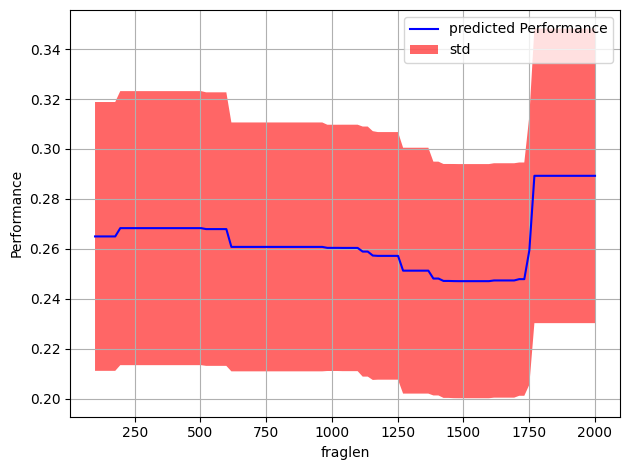

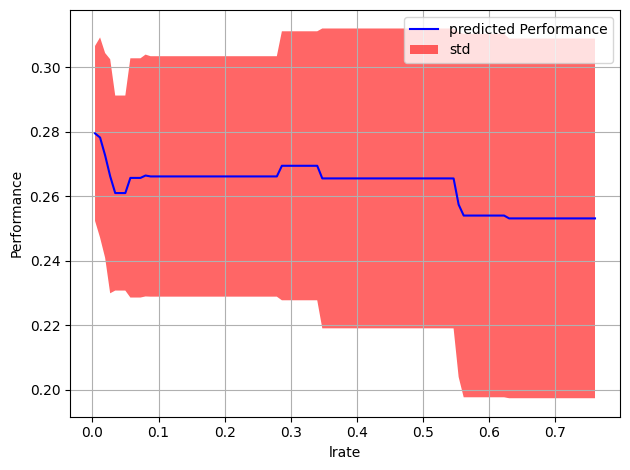

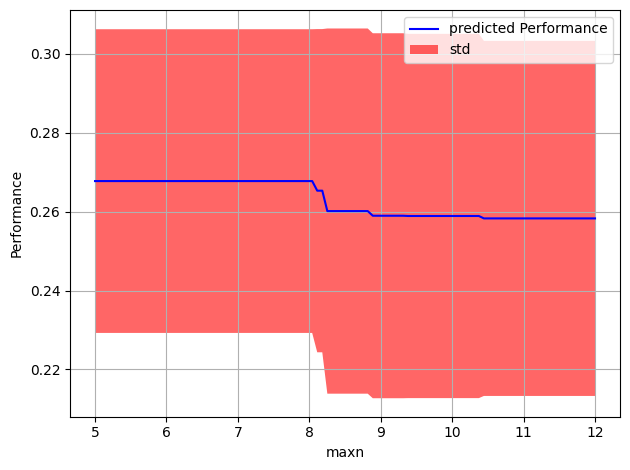

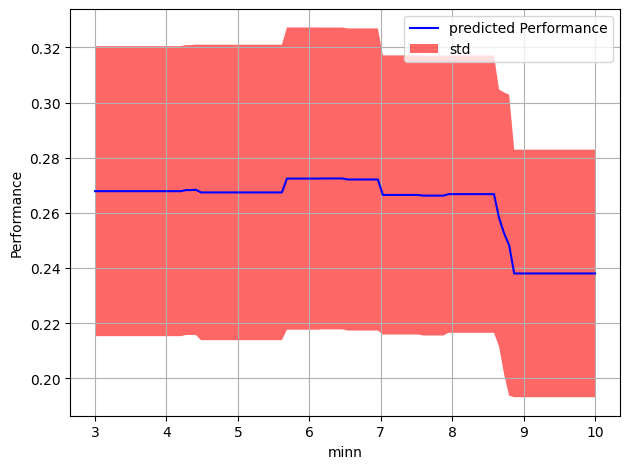

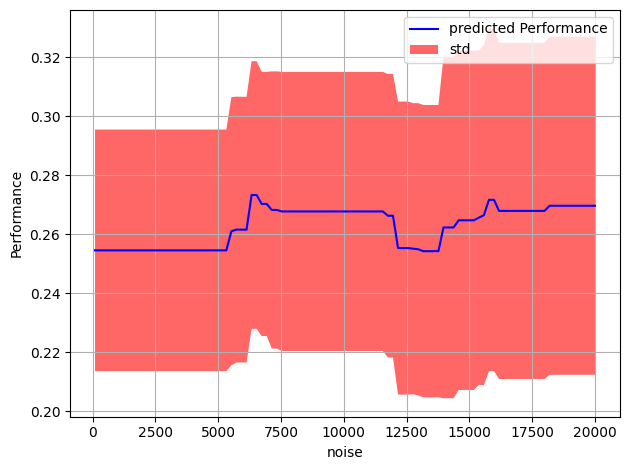

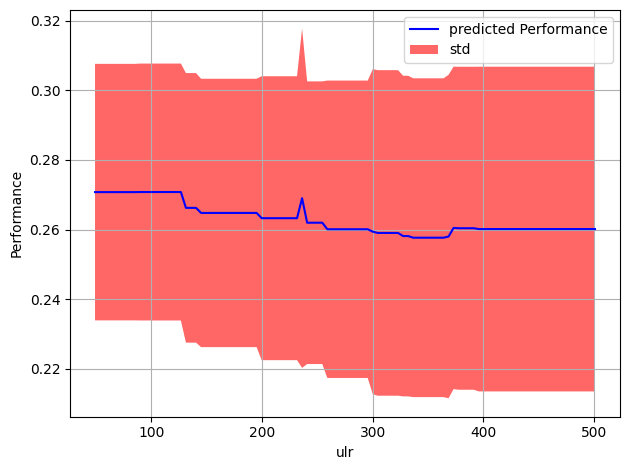

In [6]:
import fanova.fanova
import fanova.visualizer
import pandas as pd
import numpy as np
import plotly.express as px
from itables import init_notebook_mode, show
import glob
import pathlib as pl
import pickle
import pprint
import plotly.graph_objects as go
import itertools as it


# Specify the path
path = "misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/*/Optimisation_report.xlsx"
run_name = pl.Path(path).parts[-4]

# Find all xlsx files in the path
report_files = glob.glob(path)
print(report_files)

report_dfs = []
for file in report_files:
    taxname = pl.Path(file).parts[-2]
    report_df = pd.read_excel(file)
    uniq_species = species_count_host.loc[species_count_host['family'] == taxname, 'count'].iloc[0]
    viruses_num = len(df.loc[df['host_family'] == taxname, 'host_species'])
    report_df['uniq_species'] = uniq_species
    report_df['viruses_num'] = viruses_num
    report_df['taxname'] = f"{taxname} ({uniq_species} uniq. sp./{viruses_num} vir)"
    report_dfs.append(report_df)
combined_reports = pd.concat(report_dfs)

show(combined_reports)

subset = combined_reports.loc[combined_reports['taxname'].str.contains("Bacillaceae")]
show(subset)
# subset_hyper = subset[['fraglen', 'lrate', 'maxn', 'minn', 'noise', 'ulr']].to_numpy(dtype=[('fraglen', np.int64), ('lrate', np.float64), ('maxn', np.int64), ('minn', np.int64), ('noise', np.int64), ('ulr', np.float64)])
subset_hyper = subset[['fraglen', 'lrate', 'maxn', 'minn', 'noise', 'ulr']].to_numpy()
hyper_bounds = {
    'fraglen': (100 - 1, 2000 + 1),
    'lrate': (0.005 - 0.001, 0.75 + 0.01),
    'maxn': (6 - 1, 11 + 1),
    'minn': (4 - 1, 9 + 1),
    'noise': (100 - 1, 20000 + 1),
    'ulr': (50 - 1, 500 + 1)
}
config_space = fanova.ConfigSpace.ConfigurationSpace(hyper_bounds)
print(config_space)
print(config_space.get_hyperparameters())
# subset_hyper = subset[['fraglen', 'lrate', 'maxn', 'minn', 'noise', 'ulr']].to_csv("misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/subset_hyper.csv", index=False)
# subset_perf = subset[['top_species']].to_numpy(dtype=[('top_species', np.float64)])
subset_perf = subset[['top_species']].to_numpy()
show(subset_perf)

# f = fanova.fANOVA(subset_hyper, subset_perf)
f = fanova.fANOVA(subset_hyper, subset_perf, config_space=config_space, seed=1)
pprint.pprint(f.quantify_importance(list(hyper_bounds.keys())))
pprint.pprint(f.get_triple_marginals(list(hyper_bounds.keys())))
print(f.get_most_important_pairwise_marginals())
print(f.cs)
# fanova.ConfigSpace.ConfigurationSpace(configuration_space)
vis = fanova.visualizer.Visualizer(f, config_space, "misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/fanova_plots/")
# hyper_tuples = list(it.combinations(hyper_bounds.keys(), 2))
# print(hyper_tuples)
pairwise_marginal_dict = f.get_most_important_pairwise_marginals()
pprint.pprint(pairwise_marginal_dict[('noise', 'ulr')])
for hyper in hyper_bounds:
    marginal = vis.generate_marginal(hyper)
    # pairwise_marginal = pairwise_marginal_dict[hyper]
    vis.plot_marginal(hyper)
    fig = go.Figure([
    go.Scatter(
        name='Predicted performance',
        x=marginal[2],
        y=marginal[0],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound std',
        x=marginal[2],
        y=marginal[0] + marginal[1],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound std',
        x=marginal[2],
        y=marginal[0] - marginal[1],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(68, 68, 68, 0.3)',
        fill='tonexty',
        showlegend=False
    )
    ])
    fig.update_layout(
        yaxis_title='top_species',
        xaxis_title=f'{hyper}',
        # title='Marginal Plot for lrate',
        hovermode="x"
    )
    fig.show()
# marginal = vis.generate_marginal("lrate")
# pprint.pprint(marginal)
# vis.plot_marginal("lrate")
# fig = go.Figure([
#     go.Scatter(
#         name='Predicted performance',
#         x=marginal[2],
#         y=marginal[0],
#         mode='lines',
#         line=dict(color='rgb(31, 119, 180)'),
#     ),
#     go.Scatter(
#         name='Upper Bound std',
#         x=marginal[2],
#         y=marginal[0] + marginal[1],
#         mode='lines',
#         marker=dict(color="#444"),
#         line=dict(width=0),
#         showlegend=False
#     ),
#     go.Scatter(
#         name='Lower Bound std',
#         x=marginal[2],
#         y=marginal[0] - marginal[1],
#         marker=dict(color="#444"),
#         line=dict(width=0),
#         mode='lines',
#         fillcolor='rgba(68, 68, 68, 0.3)',
#         fill='tonexty',
#         showlegend=False
#     )
# ])
# fig.update_layout(
#     yaxis_title='top_species',
#     xaxis_title='lrate',
#     title='Marginal Plot for lrate',
#     hovermode="x"
# )
# fig.show()

for pair, importance in pairwise_marginal_dict.items():
    data = vis.generate_pairwise_marginal(pair)
    # pprint.pprint(data[1])

    # Extract the data
    x = data[0][0]
    y = data[0][1]
    z = data[1]

    # Create the surface plot
    fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

    # Set the plot layout
    fig.update_layout(
        title=f'3D Surface Plot for {pair}: {importance} importance',
        scene=dict(
            xaxis_title=pair[0],
            yaxis_title=pair[1],
            zaxis_title='top_species'
        )
    )

    # Show the plot
    fig.show()

# data = vis.generate_pairwise_marginal([0, 5])
# pprint.pprint(data[1])

# # Extract the data
# x = data[0][0]
# y = data[0][1]
# z = data[1]

# # Create the surface plot
# fig = go.Figure(data=[go.Surface(x=x, y=y, z=z)])

# # Set the plot layout
# fig.update_layout(
#     title='3D Surface Plot',
#     scene=dict(
#         xaxis_title='X',
#         yaxis_title='Y',
#         zaxis_title='Z'
#     )
# )

# # Show the plot
# fig.show()

# vis.create_all_plots()

# figx = pickle.load(open('misc/phastdna_galiez_species_filtertaxopt_e1_master/all_reports/fanova_plots/interactive_plots/fraglen_ulr.fig.pkl', 'rb'))
# figx.show()

## get preds for each virus fragment (prep for vector creation for metaclassifier)

In [3]:
import pandas as pd
import pickle
import pathlib as pl
from itables import init_notebook_mode, show
import pprint

temp = pl.PosixPath
pl.PosixPath = pl.WindowsPath

with open('misc/phastdna_galiez_taxfilter_pred-phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/11_03_full/fastdna_pred_jobs', 'rb') as f:
    df_list = pickle.load(f)

with open('misc/phastdna_galiez_taxfilter_pred-phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/11_03_full/virus_samples', 'rb') as f:
    virus_labels = pickle.load(f)

with open('misc/phastdna_galiez_taxfilter_pred-phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/11_03_full/score_jobs', 'rb') as f:
    score_jobs = pickle.load(f)

print(type(score_jobs[0]))
print(len(df_list))
pprint.pprint(virus_labels)
print(len(virus_labels))
# show(df_list[0])
vectors_map = {}
df = df_list[0]
sorted_columns = {}
for column_name in df.columns:
    column_values = df[column_name].sort_values(ascending=False).tolist()
    sorted_columns[column_name] = column_values

vectors_map[virus_labels[0].stem] = sorted_columns

pprint.pprint(vectors_map)


# shapes = [df.shape for df in df_list]
# nulls = [df.isnull().values.any() for df in df_list]
# nunique_vals = [df.nunique() for df in df_list]
# apply unique to each column and if all are unique, then the make the column a list
# unique_cols = [col.tolist() if col.nunique() == col.shape[0] else col for col in df]

# unique values
# unique_vals = [df.apply(lambda x: pd.array(x.unique()).tolist() ) for df in df_list]
# print(unique_vals[3])


# 4. Jeśli gospodarz am mniej niż d lub nie ma go w ogóle to brakujące wartości uzupełniamy (np. 1e-6 tak jak wcześniej) - czyli zawsze musza byc wszyscy gospodarze (tj. wszystkie mozliwe osobniki z host.json. czy tylko te, które są hostami w virus.json?)
# osobne zestawy wektorów dla treningow:
# - examples: species, labels: genus
# - examples: species, labels: species

<class 'pandas.core.series.Series'>
64
[WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier/fasta_sample/NC_009760.fna'),
 WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier/fasta_sample/NC_022765.fna'),
 WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier/fasta_sample/NC_020480.fna'),
 WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier/fasta_sample/NC_018085.fna'),
 WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_filtertaxopt_e1_Bacillaceae_pickletest2/best_classifier/fasta_sample/NC_006945.fna'),
 WindowsPath('/mnt/storage_3/home/mmichalczyk/pl0275-01/scratch/phastdna_galiez_species_fil